# Smart Home Dataset with Weather Information


**Table Of Contents**
1. Data Pre-processing
2. Data Transformation
3. Data Visualization
4. Correlation between features

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.ensemble import IsolationForest
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose


## Part 1 - Data Pre-processing

### 1.time

In [2]:
home_df = pd.read_csv('HomeC.csv',low_memory=False)            #Read the dataset..
home_df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [3]:
home_df.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


**Remove the last row that contains invalid values.**

In [4]:
#Removing the last row as it is invalid,the whole row was a type error
home_df = home_df[0:-1]

In [5]:
home_df.tail(5)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


**The column names contain the unit value in the title. Remove the [kW] the columns.**

In [6]:
#Removing [kW] from column names,to simplify the process.
home_df.columns = [col.replace(' [kW]', '') for col in home_df.columns]
home_df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [7]:
home_df.head()

,time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


### 2. Furnace and Kitchen

**There are multiple columns of similar rooms in the dataset. For example, there is 'Furnace 1' and 'Furnace 2'. We can remove the additional columns by summing them.**

In [8]:
#Summing the columns 'Furnace 1' and 'Furnace 2' since we only need the total energy usage by both the furnaces
home_df['Furnace'] = home_df[['Furnace 1','Furnace 2']].sum(axis=1)


In [9]:
#Finding the average usage of all kitchens('Kitchen 12','Kitchen 14','Kitchen 38')
home_df['Kitchen'] = home_df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [10]:
#Dropping old columns on which the aggregation have been done
home_df = home_df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)

In [11]:
#Cross checking for new features..
home_df.head(10)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000567
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000567
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.083017,0.000617
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.175417,0.000650
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.300917,0.000783
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.447033,0.122300,0.006717,0.012433,0.031450,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.566917,0.001050
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.443267,0.122050,0.006733,0.012417,0.031550,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.563117,0.001067
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.444283,0.121800,0.006783,0.012550,0.031733,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.656500,0.000933
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.441467,0.121617,0.006950,0.012717,0.031767,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.813350,0.000783
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.438733,0.121633,0.007233,0.013350,0.031667,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.854050,0.000417


### 3. timestamp

**The column 'time' is in unix timestamp. Convert the timestamp to date and time.**

In [12]:
#Dataset contains values in time column was in object form.so we have converted it into Datetime format.
#we have used date range function to assign time in sequence and in per minute arrangement.
#we have set time feature as index of whole dataset..

time_index = pd.date_range('2020-01-01 05:00', periods=len(home_df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home_df = home_df.set_index(time_index)
home_df = home_df.drop(['time'], axis=1)
home_df.iloc[np.r_[0:5,-5:0]].iloc[:,0]



2020-01-01 05:00:00    0.932833
2020-01-01 05:01:00    0.934333
2020-01-01 05:02:00    0.931817
2020-01-01 05:03:00    1.022050
2020-01-01 05:04:00    1.139400
2020-12-16 03:25:00    1.601233
2020-12-16 03:26:00    1.599333
2020-12-16 03:27:00    1.924267
2020-12-16 03:28:00    1.978200
2020-12-16 03:29:00    1.990950
Name: use, dtype: float64

In [13]:
home_df.tail(10)

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2020-12-16 03:20:00,1.522583,0.003200,1.522583,0.000067,0.041767,0.005283,0.008433,0.013533,0.031967,0.000967,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.650267,0.000650
2020-12-16 03:21:00,1.537383,0.003183,1.537383,0.000133,0.042033,0.005283,0.008333,0.013517,0.032017,0.000983,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.664417,0.000700
2020-12-16 03:22:00,1.551817,0.003200,1.551817,0.000050,0.041750,0.005250,0.008450,0.013483,0.032117,0.001000,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.680983,0.000617
2020-12-16 03:23:00,1.599617,0.003217,1.599617,0.000067,0.041750,0.005617,0.008467,0.013450,0.032167,0.000983,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.727867,0.000617
2020-12-16 03:24:00,1.608867,0.003217,1.608867,0.000033,0.041817,0.005217,0.008350,0.013433,0.032283,0.001017,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.737583,0.000617
2020-12-16 03:25:00,1.601233,0.003183,1.601233,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,0.000983,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.727683,0.000633
2020-12-16 03:26:00,1.599333,0.003233,1.599333,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.729050,0.000600
2020-12-16 03:27:00,1.924267,0.003217,1.924267,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.060117,0.000600
2020-12-16 03:28:00,1.978200,0.003217,1.978200,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,0.000950,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.116033,0.000650
2020-12-16 03:29:00,1.990950,0.003233,1.990950,0.000050,0.042100,0.004917,0.008133,0.012833,0.032167,0.000950,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.128833,0.000650


**Examine the data type of each column.**

In [14]:
#Display dataframe info
home_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2020-01-01 05:00:00 to 2020-12-16 03:29:00
Freq: T
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   House overall        503910 non-null  float64
 3   Dishwasher           503910 non-null  float64
 4   Home office          503910 non-null  float64
 5   Fridge               503910 non-null  float64
 6   Wine cellar          503910 non-null  float64
 7   Garage door          503910 non-null  float64
 8   Barn                 503910 non-null  float64
 9   Well                 503910 non-null  float64
 10  Microwave            503910 non-null  float64
 11  Living room          503910 non-null  float64
 12  Solar                503910 non-null  float64
 13  temperature          503910 non-null  float64
 14  icon                 50391

In [ ]:
# home_df

### 4. cloudcover

In [ ]:
#We replace these missing values with the next valid observation we have
# we do change string values replaced with next row values of numerical
# bfill method used to backward fill the missing values in the dataset. 
# It will backward fill the NaN values that are present

In [16]:
home_df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
home_df['cloudCover'] = home_df['cloudCover'].astype('float')  # change datatype object to float

### 5. use and house overall

In [17]:
#It seems use and House overall show the same data
home_df[['use', 'House overall']].head()

,use,House overall
2020-01-01 05:00:00,0.932833,0.932833
2020-01-01 05:01:00,0.934333,0.934333
2020-01-01 05:02:00,0.931817,0.931817
2020-01-01 05:03:00,1.022050,1.022050
2020-01-01 05:04:00,1.139400,1.139400


In [18]:
#Since the from  above confirms both the columns indicate the same data lets go ahead and remove 'House overall'
home_df = home_df.drop(columns=['House overall'])
home_df.shape

(503910, 27)

### 6. Icon renamed to whether_pattern and encoding

In [19]:
home_df["icon"].unique()

array(['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog'], dtype=object)

In [20]:
# WE do Encoding here to utilize this feature, means conversion of object to int datadype

In [21]:
home_df["icon"].replace({"clear-night":0,
                    'partly-cloudy-night':1,
                    "clear-day":2,
                    "cloudy":3,
                    "partly-cloudy-day":4,
                    "rain":5,
                    "snow":6,
                    "wind":7,
                    "fog":8
                   },inplace=True)

In [22]:
home_df["icon"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [23]:
home_df.rename({"icon":"whether_pattern"},axis=1,inplace=True) # rename icon to whether_pattern

### 7. Feature: Summary

In [24]:
# WE do Encoding here to utilize this feature, means conversion of object to int datadype

In [25]:
home_df["summary"].nunique()

18

In [26]:
home_df["summary"].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [ ]:
#label Encoding

In [27]:
home_df["summary"].replace({"Clear":18,
                    "Mostly Cloudy":17,
                    "Overcast":16,
                    "Partly Cloudy":15,
                    "Drizzle":14,
                    "Light Rain":13,
                    "Rain":12,
                    "Light Snow":11,
                    "Flurries":10,
                    "Breezy":9,
                    "Snow":8,
                    "Rain and Breezy":7,
                    "Foggy":6,
                    "Breezy and Mostly Cloudy":5,
                    "Breezy and Partly Cloudy":4,
                    "Drizzle":3,
                    "Flurries and Breezy":2,
                    "Dry":1,
                    "Heavy Snow":0
                   },inplace=True)

## 8. Feature:Solar

In [28]:
## on primary observation we see most values same of these two features >>> "gen" and "Solar"

In [31]:
(home_df["Solar"] == home_df["gen"]).all()   ## we check they are same or Not

True

In [32]:
home_df.drop(columns="Solar",axis=1,inplace=True) # It was same as "gen" feature, so we drop

## Part 2 - Data Transformation

In [39]:
#Creating two separate dataframe objects with energy and weather data respectively for detailed analysis.

energy_data = home_df.filter(items=[ 'gen', 'use', 'Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room'])

weather_data = home_df.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint'])


## Resample Time

In [40]:
## original data is as per minute is recorded, but for clear analysis and for clients demand we have resample data in form of 
## two hour,daywise, weekly. from this we can infere some imporatant insights for further analysis.
## Before Resampling We Have to check all values in Numerical data-type 

In [41]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2020-01-01 05:00:00 to 2020-12-16 03:29:00
Freq: T
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   Dishwasher           503910 non-null  float64
 3   Home office          503910 non-null  float64
 4   Fridge               503910 non-null  float64
 5   Wine cellar          503910 non-null  float64
 6   Garage door          503910 non-null  float64
 7   Barn                 503910 non-null  float64
 8   Well                 503910 non-null  float64
 9   Microwave            503910 non-null  float64
 10  Living room          503910 non-null  float64
 11  temperature          503910 non-null  float64
 12  whether_pattern      503910 non-null  int64  
 13  humidity             503910 non-null  float64
 14  visibility           50391

In [42]:
energy_data.head()

,gen,use,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2020-01-01 05:00:00,0.003483,0.932833,0.000033,0.082617,0.442633,0.124150,0.006983,0.013083,0.000567,0.031350,0.001017,0.004067,0.001517
2020-01-01 05:01:00,0.003467,0.934333,0.000000,0.084533,0.444067,0.124000,0.006983,0.013117,0.000567,0.031500,0.001017,0.004067,0.001650
2020-01-01 05:02:00,0.003467,0.931817,0.000017,0.083017,0.446067,0.123533,0.006983,0.013083,0.000617,0.031517,0.001000,0.004067,0.001650
2020-01-01 05:03:00,0.003483,1.022050,0.000017,0.175417,0.446583,0.123133,0.006983,0.013000,0.000650,0.031500,0.001017,0.004067,0.001617
2020-01-01 05:04:00,0.003467,1.139400,0.000133,0.300917,0.446533,0.122850,0.006850,0.012783,0.000783,0.031500,0.001017,0.004067,0.001583


In [43]:
weather_data.head()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint
2020-01-01 05:00:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2020-01-01 05:01:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2020-01-01 05:02:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2020-01-01 05:03:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2020-01-01 05:04:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4


In [44]:
#Generating the data per 2 hour
energy_per_2h = energy_data.resample('2H').sum()
energy_per_2h.head()

,gen,use,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2020-01-01 04:00:00,0.198417,62.647783,0.003817,23.591283,14.508850,2.271667,3.801033,0.782767,0.049234,2.332833,0.062533,1.299100,0.090283
2020-01-01 06:00:00,0.412200,97.974183,0.008501,49.732650,5.202583,8.100450,7.207550,1.568083,0.088502,4.417233,0.122083,0.507700,0.194800
2020-01-01 08:00:00,0.413200,95.990950,0.011917,57.612767,6.504333,5.731067,0.851250,1.568717,0.096085,3.961483,0.121800,0.511917,0.197067
2020-01-01 10:00:00,0.410900,121.089800,0.009367,78.951533,5.190333,6.641300,0.858250,1.570500,0.092252,3.954200,0.121300,0.507800,0.193650
2020-01-01 12:00:00,0.594183,53.725883,0.005601,21.289533,5.076633,5.580133,0.843117,1.560717,0.087802,3.678683,0.121383,0.507683,0.189317


In [45]:
#Generating the data per day
energy_per_day = energy_data.resample('D').sum()
energy_per_day.head()

,gen,use,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2020-01-01,18.026200,1366.269517,59.517171,492.020017,64.668783,94.740300,29.093367,15.228367,11.619833,99.622950,30.537233,12.961117,77.071667
2020-01-02,76.051300,1851.521067,63.154404,683.761967,145.570317,74.851733,24.096767,19.246333,15.464256,185.776967,33.688133,12.480300,71.142950
2020-01-03,74.081433,1651.128133,105.508668,613.630533,196.064167,92.149033,32.989533,19.444933,19.092004,146.493667,31.955233,19.066117,42.779250
2020-01-04,108.525017,1500.686017,58.880760,605.129767,180.650867,71.016683,20.980700,19.249983,17.346254,47.837017,43.438883,20.249933,93.077467
2020-01-05,148.107500,1597.968867,72.973254,817.065250,133.360867,80.135633,30.792300,19.773067,14.754489,50.166067,19.157417,16.658967,44.483650


In [48]:
#Generating the data per week
energy_per_week = energy_data.resample('w').sum()    
energy_per_week.head()

,gen,use,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2020-01-05,424.791450,7967.573600,360.034257,3211.607533,720.315000,412.893383,137.952667,92.942683,78.276835,529.896667,158.776900,81.416433,328.554983
2020-01-12,452.383250,10344.390383,315.493262,4195.096533,1045.778883,606.042967,182.305783,138.460850,103.262495,696.016517,150.997717,98.503267,574.934367
2020-01-19,516.519633,11376.083200,414.647473,5219.068733,1041.856533,528.109100,193.905333,137.982317,102.634730,585.370333,173.984884,85.651367,465.212299
2020-01-26,744.459350,10075.120700,323.435173,4913.863550,724.849800,521.649417,178.663000,137.979600,103.753449,902.828833,178.889533,96.268284,311.741700
2020-02-02,669.385083,9025.880100,384.723182,3496.050733,708.768917,535.470000,207.540100,137.879983,104.498570,781.393233,161.903667,92.892533,362.720417


## Part 3 - Data Visualization

<AxesSubplot:title={'center':'Overall energy consumption in kW per day'}>

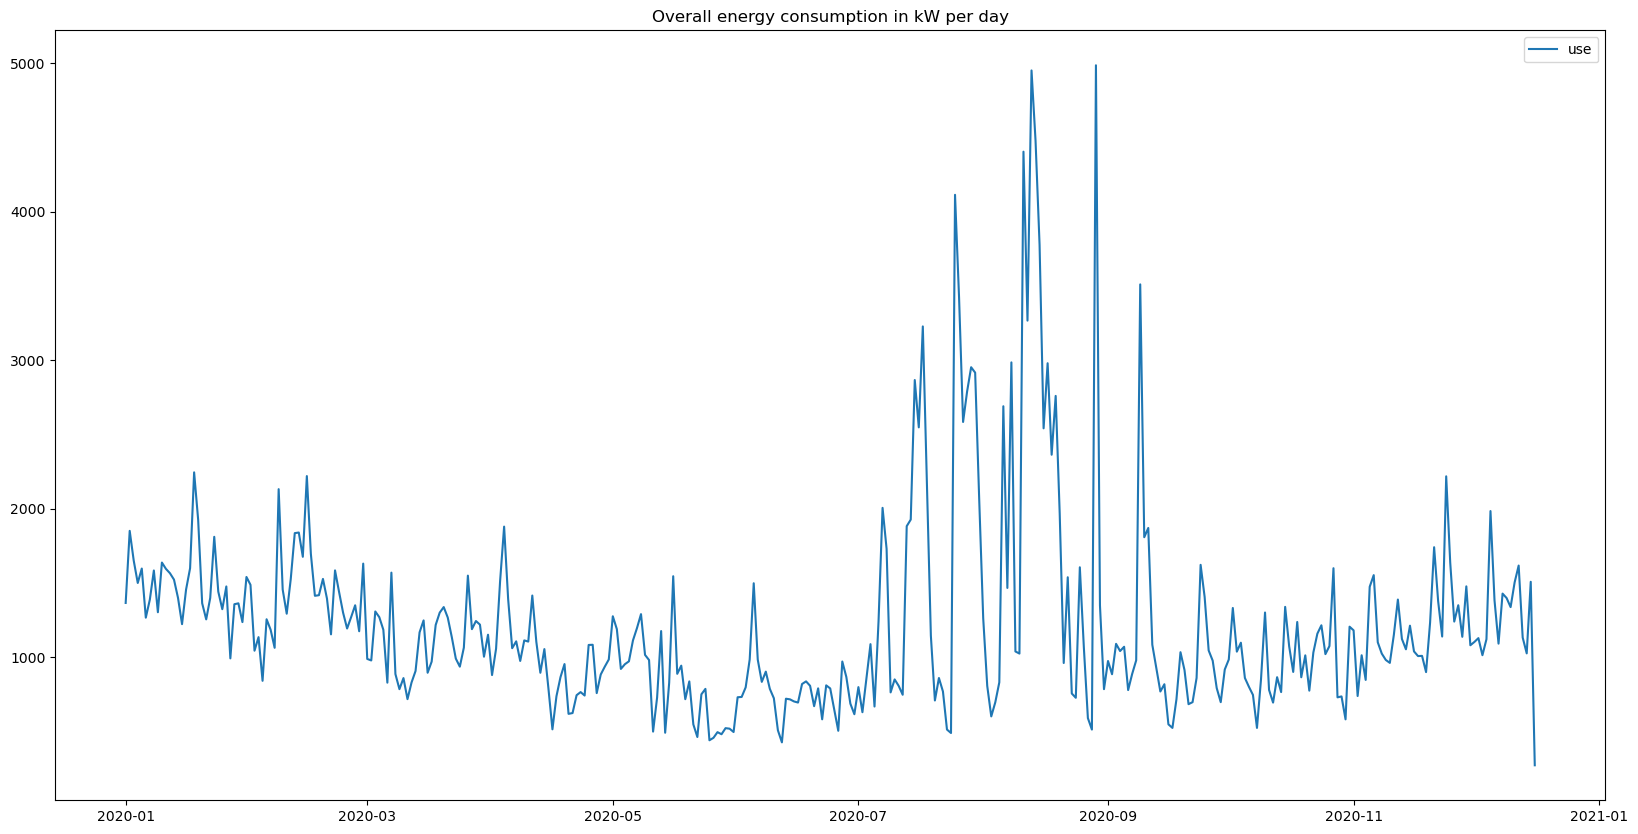

In [49]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per day")
#Plotting the energy consumption per day
sns.lineplot(data = energy_per_day.filter(items=['use']), dashes=False)

<AxesSubplot:title={'center':'Overall energy consumption in kW per 2h'}>

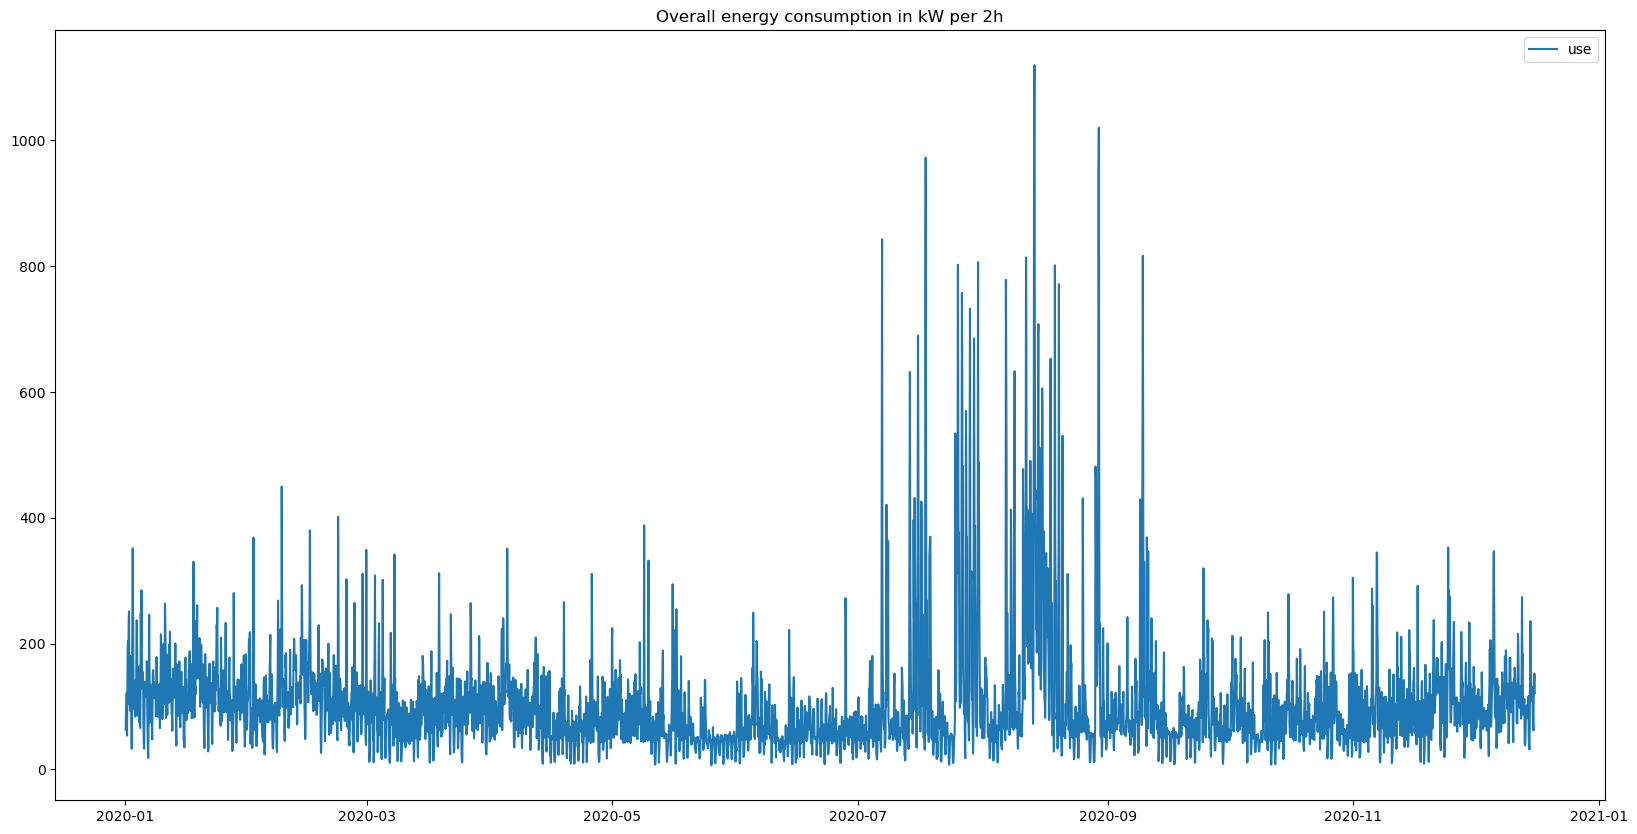

In [50]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per 2h")
#Plotting the energy consumption per 2h
sns.lineplot(data = energy_per_2h.filter(items=['use']), dashes=False)

<AxesSubplot:title={'center':'Overall energy consumption in kW per week'}>

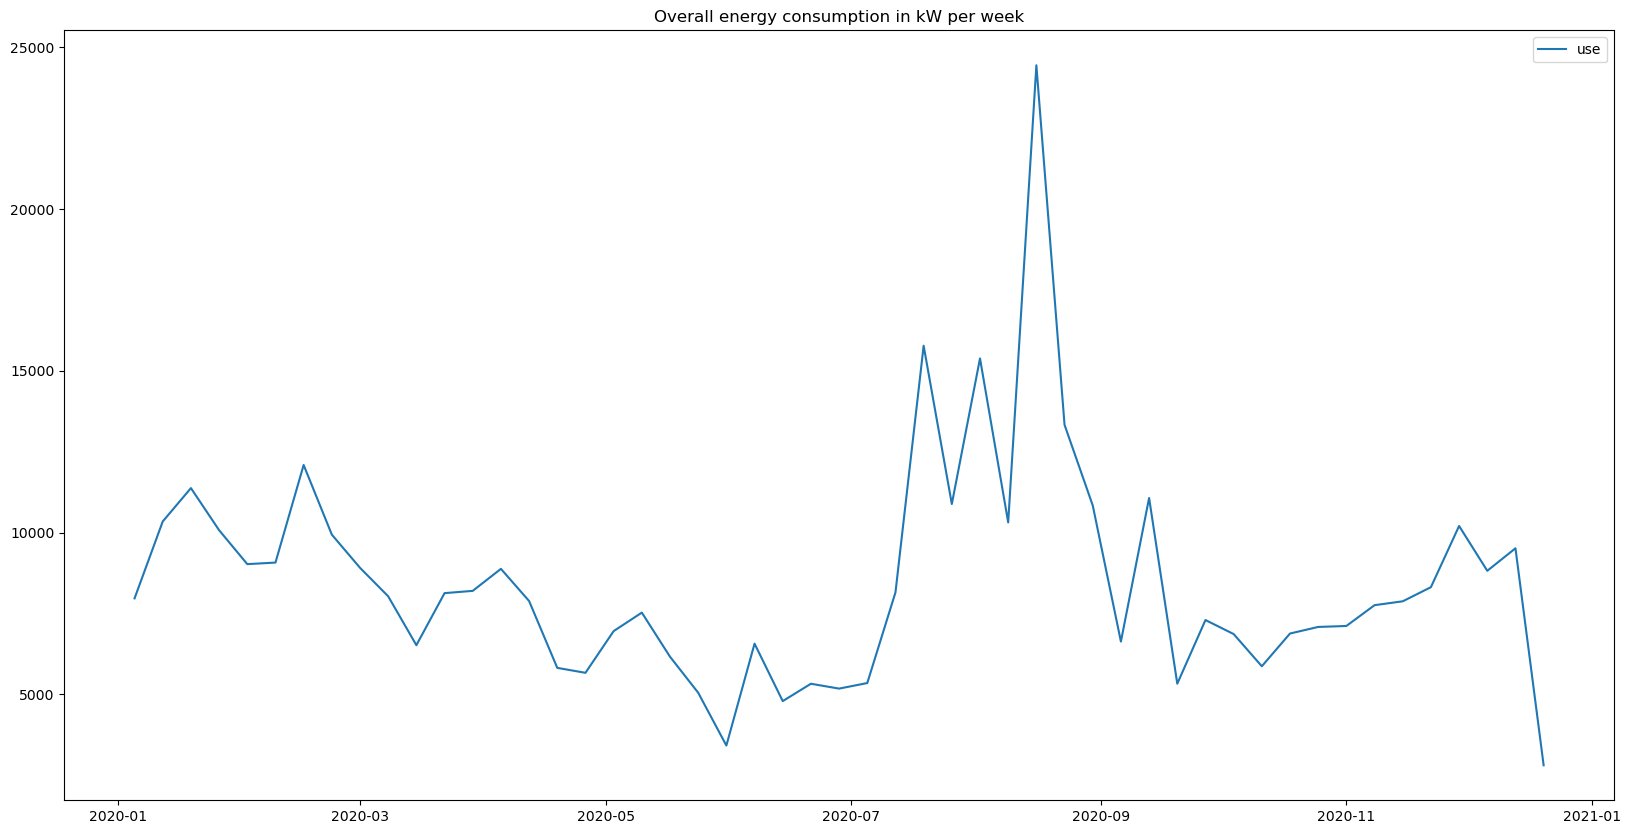

In [75]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per week")
#Plotting the energy consumption per week
sns.lineplot(data = energy_per_week.filter(items=['use']), dashes=False)

<AxesSubplot:title={'center':'Energy consumption in kW per day by individual room/appliance'}>

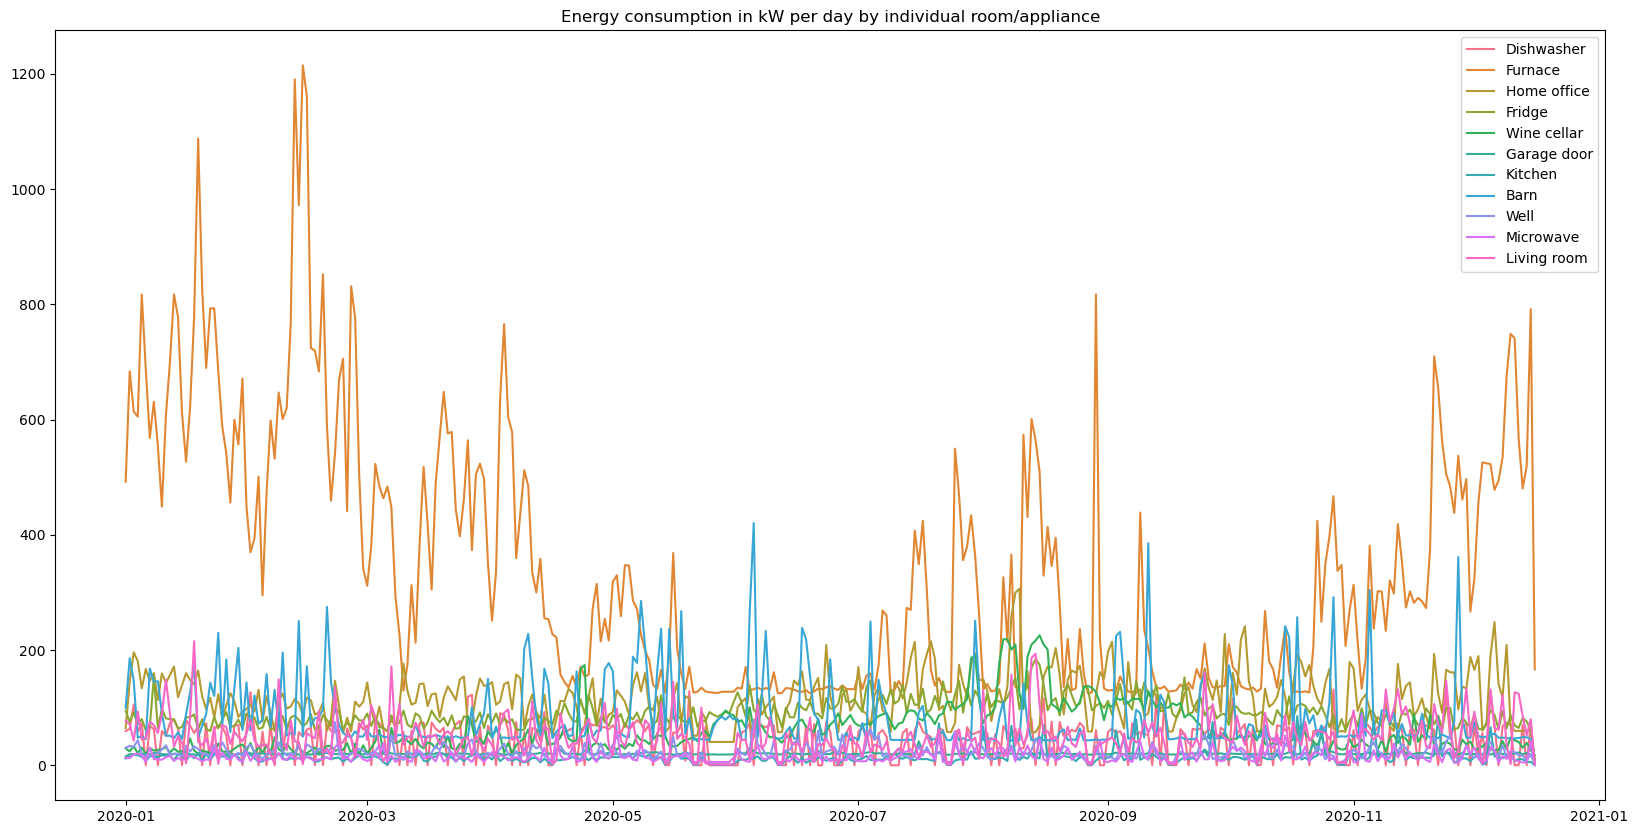

In [52]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per day by individual room/appliance")
sns.lineplot(data = energy_per_day.filter(items=['Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)

**The above plot indicates that furnace has the highest energy consumption among the rooms/devices in the smart home in a day**

<AxesSubplot:title={'center':'Energy consumption in kW per month by individual room/appliance'}>

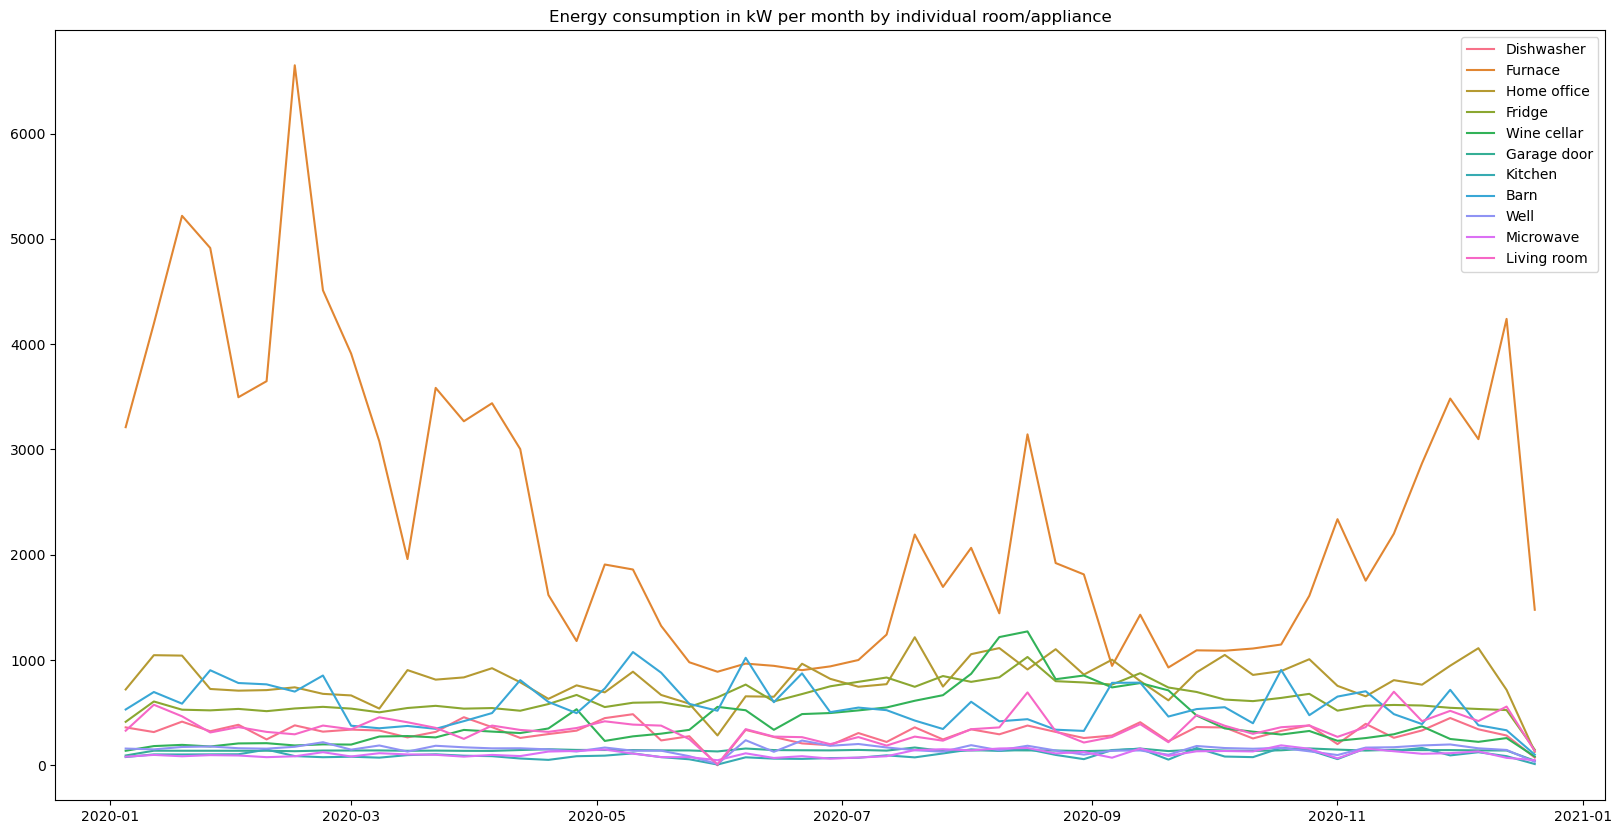

In [76]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per month by individual room/appliance")
sns.lineplot(data = energy_per_week.filter(items=['Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)

**The above plot indicates that furnace has the highest energy consumption among the rooms/devices and Kitchen has the lowest in the smart home in a week.**

****

## Part 4 - Correlation between features

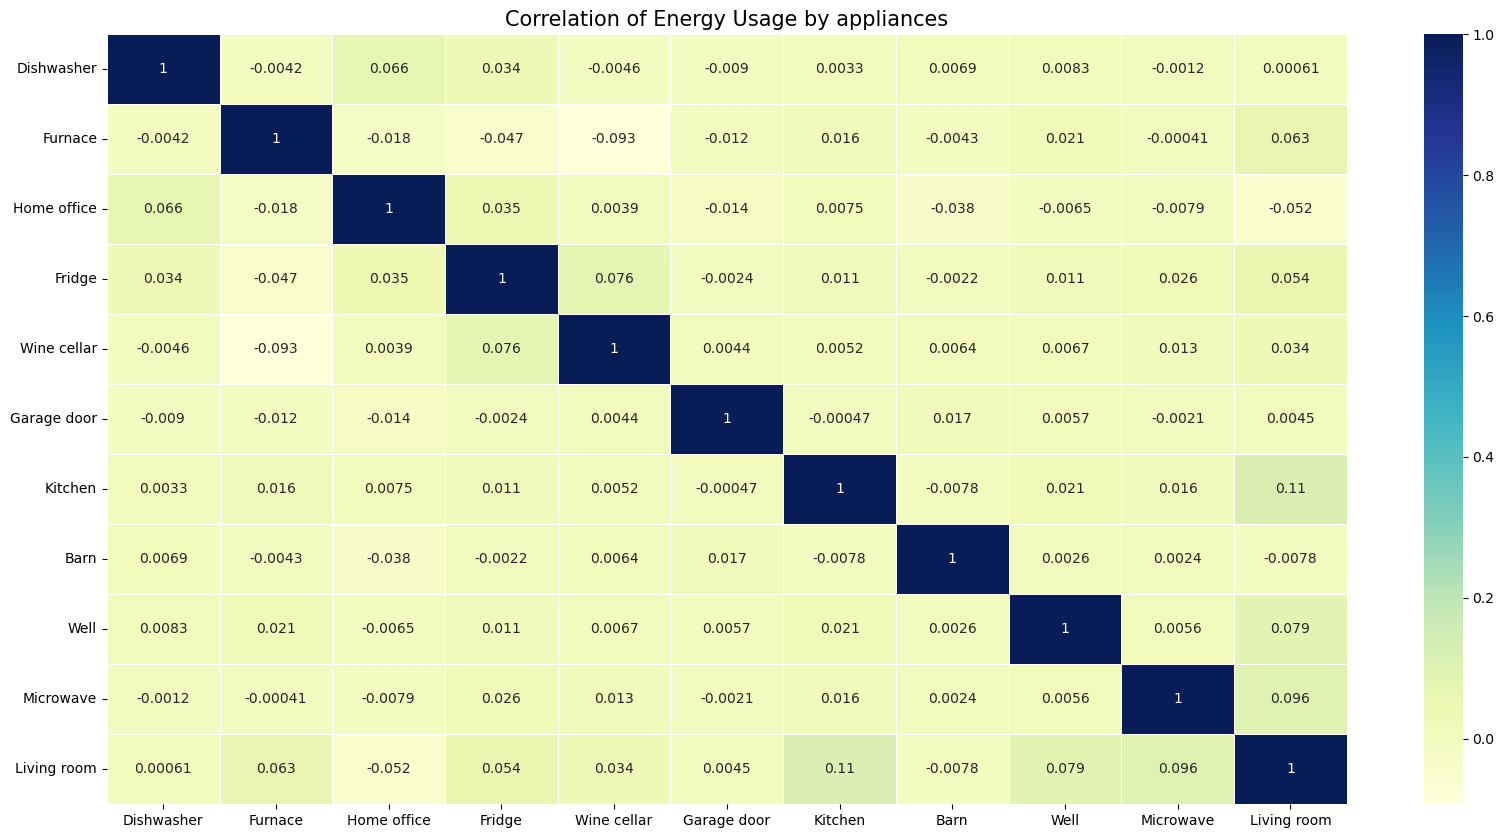

In [57]:
#Correlation of energy usage by home appliances

energy_corr = energy_data.loc[:,'Dishwasher':].corr()
fig,ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(energy_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation of Energy Usage by appliances", size=15)
plt.show()

**No significant relationship between features, positive or negative, was observed. It is safe to presume that there is no interdependency between appliances when it comes to energy consumption.**

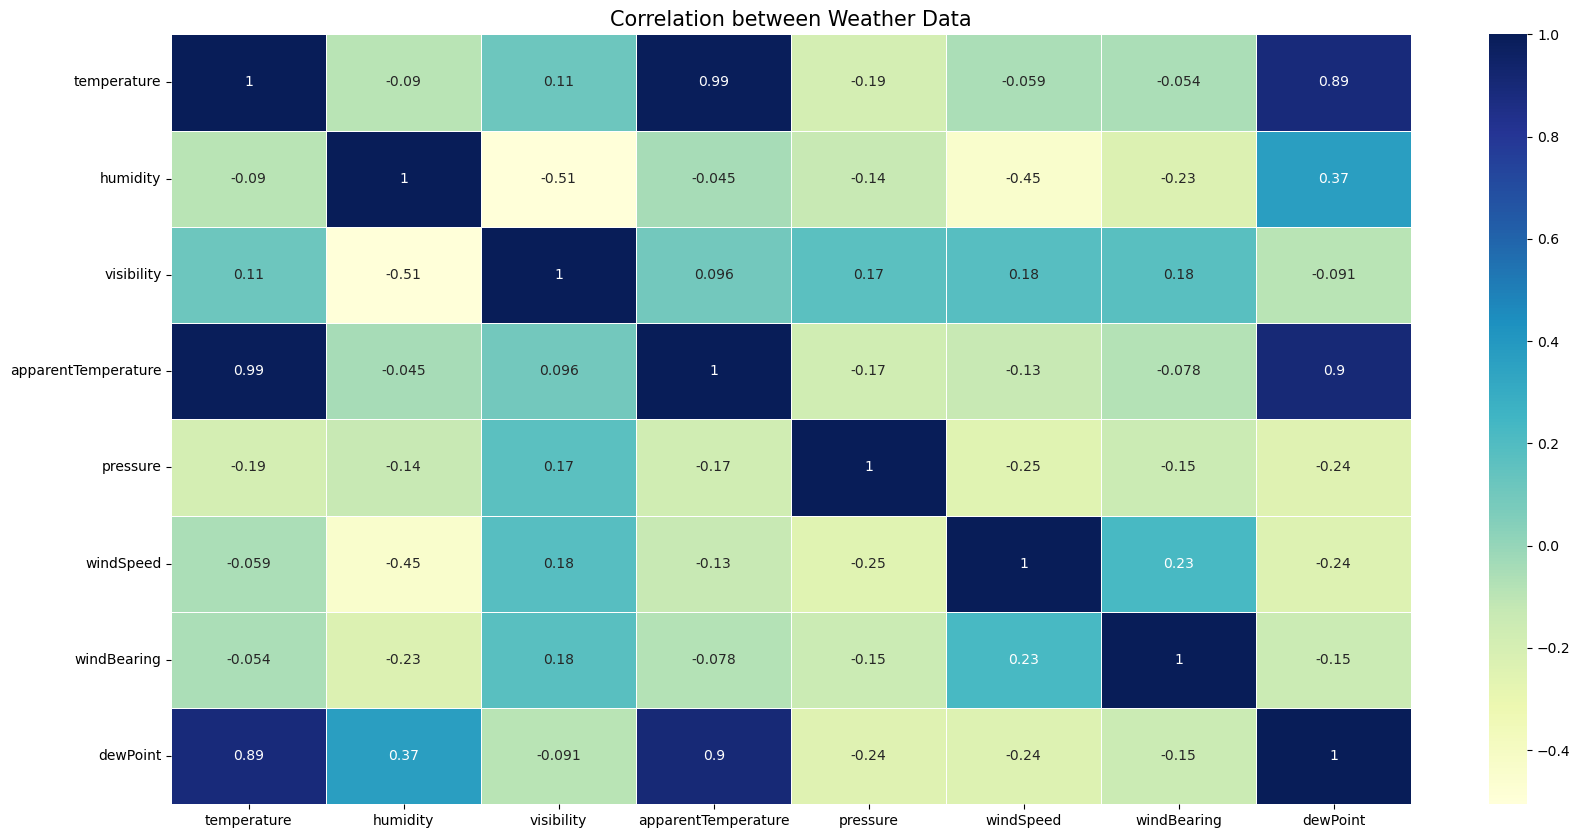

In [58]:
#Correlation between weather data

weather_corr = weather_data.corr()
fig,ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(weather_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between Weather Data", size=15)
plt.show()

**Strong positive correlation is observed here between some weather features:** 
**1. temperature and apparentTemperature (0.99)**
**2. temperature and dewPoint (0.89)**
**3. apparentTemperature and dewPoint (0.9)**

In [59]:
# Merge energy and weather datasets
allData_df = pd.merge(energy_data.loc[:,'Dishwasher':], weather_data, left_index=True, right_index=True)
allData_df.head()

,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint
2020-01-01 05:00:00,0.000033,0.082617,0.442633,0.124150,0.006983,0.013083,0.000567,0.031350,0.001017,0.004067,0.001517,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2020-01-01 05:01:00,0.000000,0.084533,0.444067,0.124000,0.006983,0.013117,0.000567,0.031500,0.001017,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2020-01-01 05:02:00,0.000017,0.083017,0.446067,0.123533,0.006983,0.013083,0.000617,0.031517,0.001000,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2020-01-01 05:03:00,0.000017,0.175417,0.446583,0.123133,0.006983,0.013000,0.000650,0.031500,0.001017,0.004067,0.001617,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2020-01-01 05:04:00,0.000133,0.300917,0.446533,0.122850,0.006850,0.012783,0.000783,0.031500,0.001017,0.004067,0.001583,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4


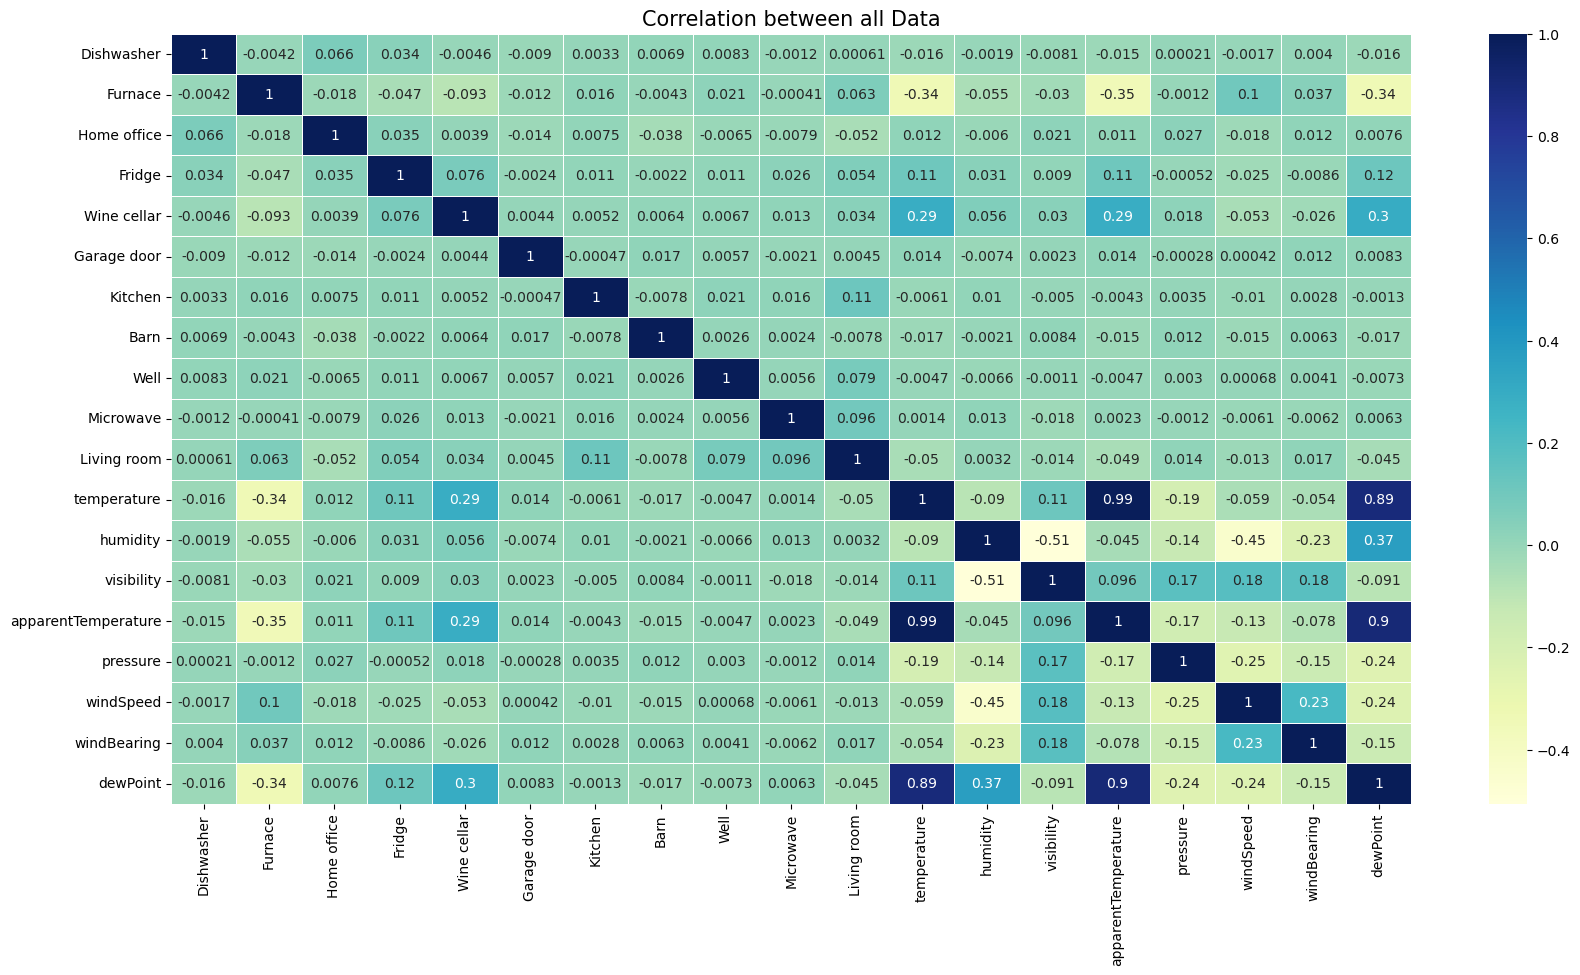

In [60]:
#Correlation between all data

all_corr = allData_df.corr()
fig,ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(all_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between all Data", size=15)
plt.show()

**Weak correlation between wine cellar and weather features like dewPoint(0.3), apparentTemperature(0.29) and temperature(0.29).
Relationships observed between other features as well, but not as significant.**

## Part 5 - Time Series Analysis

In [77]:
# define function to convert hour to time of day

def convertHourToPartOfDay(x):
    if x in [22,23,0,1,2,3]:
        part = 'Night'
    elif x in range(4, 12):
        part = 'Morning'
    elif x in range(12, 17):
        part = 'Afternoon'
    elif x in range(17, 22):
        part = 'Evening'
    else:
        part = 'X'
    return part

In [ ]:
# energy_per_part_of_day new variable assign to energy data.
# "hour" column added and time segregated into integer values for part column.
# "part" column added for morning,night etc. and called function named "convertHourToPartOfDay"

In [108]:
energy_per_part_of_day = energy_data.loc[:]
energy_per_part_of_day['hour'] = energy_per_part_of_day.index.map(lambda x: x.hour)
energy_per_part_of_day['part'] = energy_per_part_of_day['hour'].apply(convertHourToPartOfDay)

2020-01-01 05:00:00    Morning
2020-01-01 05:01:00    Morning
2020-01-01 05:02:00    Morning
2020-01-01 05:03:00    Morning
2020-01-01 05:04:00    Morning
                        ...   
2020-12-16 03:25:00      Night
2020-12-16 03:26:00      Night
2020-12-16 03:27:00      Night
2020-12-16 03:28:00      Night
2020-12-16 03:29:00      Night
Freq: T, Name: part, Length: 503910, dtype: object

In [100]:
# we define a function "groupByPartOfDay".

# we group by parts of day(like morning) and aggregate by their mean
# change columns use to use_mean and new column part to part_num
# covert part_num to index
# sort values

def groupByPartOfDay(column):
    partOfDayDf = energy_per_part_of_day.groupby('part').agg({column:['mean']})
    partOfDayDf.columns = [f"{i[0]}_{i[1]}" for i in partOfDayDf.columns]
    partOfDayDf['part_num'] = [['Morning','Afternoon','Evening','Night'].index(i) for i in partOfDayDf.index]
    partOfDayDf.sort_values('part_num', inplace=True)
    return partOfDayDf

In [101]:
groupByPartOfDay("use")

,use_mean,part_num
part,,
Morning,0.711257,0
Afternoon,0.668575,1
Evening,0.871295,2
Night,1.204294,3


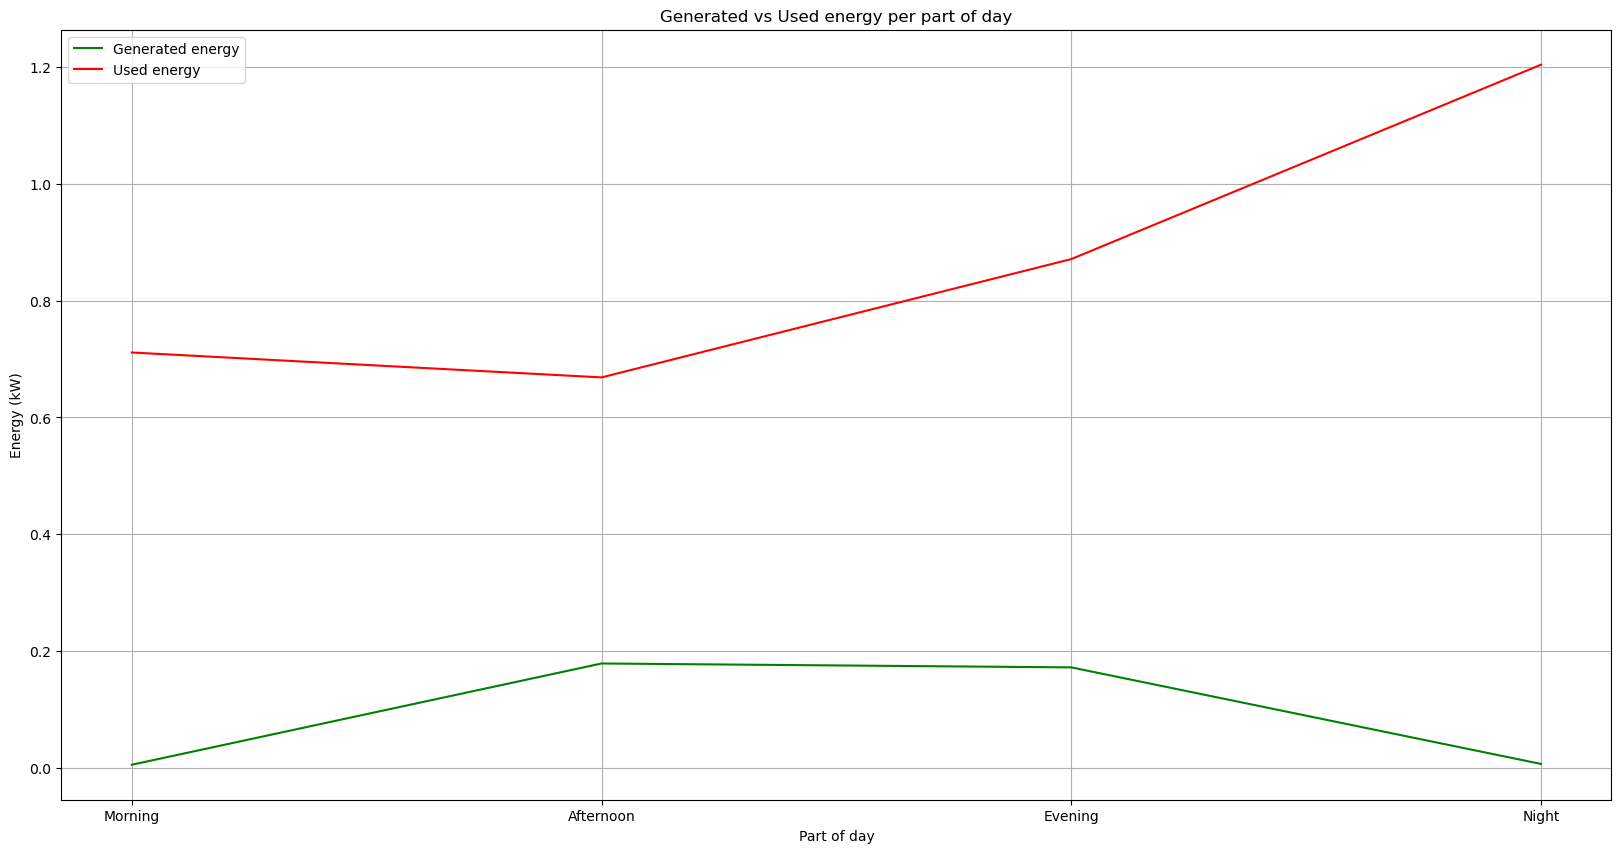

In [64]:
# Plot generated vs used energy per part of day

plt.figure(figsize=(20,10))
plt.plot(groupByPartOfDay('gen'), 'g', label='Generated energy')
plt.plot(groupByPartOfDay('use'), 'r', label='Used energy')
plt.title('Generated vs Used energy per part of day')
plt.ylabel('Energy (kW)')
plt.xlabel('Part of day')
plt.legend()
plt.grid(True)
plt.show()

**Highest energy usage is observed during evening and night. The energy generation is relatively higher during afternoon and evening.**

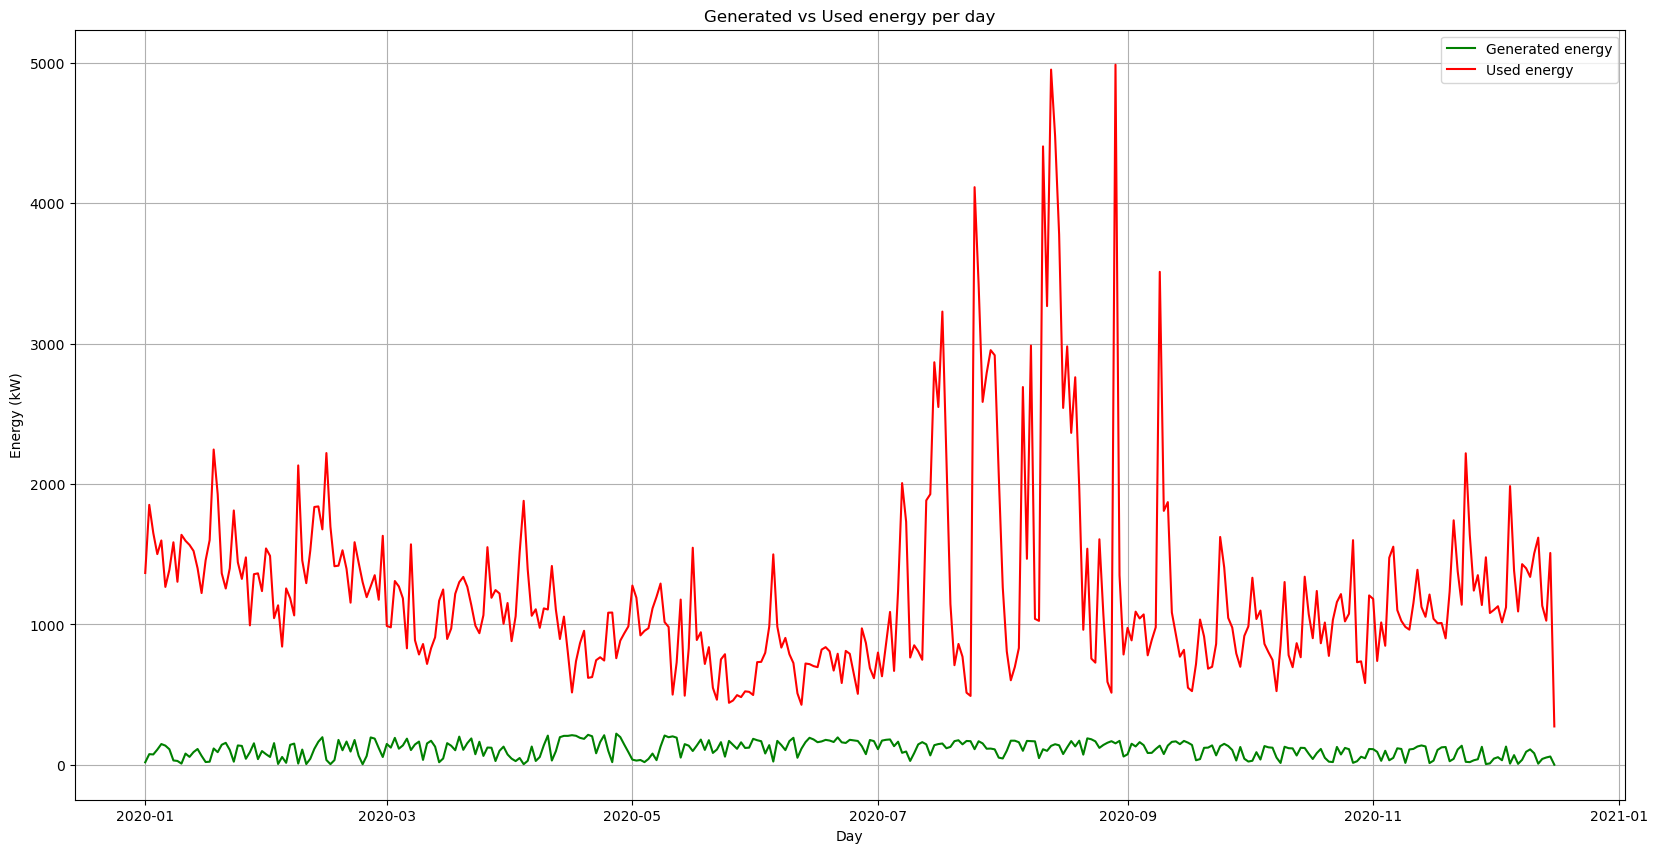

In [65]:
# Plot generated vs used energy per day

plt.figure(figsize=(20,10))
plt.plot(energy_per_day.gen, 'g', label='Generated energy')
plt.plot(energy_per_day.use, 'r', label='Used energy')
plt.title('Generated vs Used energy per day')
plt.ylabel('Energy (kW)')
plt.xlabel('Day')
plt.legend()
plt.grid(True)
plt.show()

**Highest energy usage is observed in the days between July and September. The energy generation is mostly consistent throughtout the year.**

##  main factors of Time-Series Analysis:
### 1. Autocorrelation
### 2. Stationarity

**1. Autocorrelation**

In [ ]:
# Autocorrelation is the correlation between two values in a time series.
# In other words, the time series data correlate with themselves—hence.
# We talk about these correlations using the term “lags.”

In [ ]:
A time series with lag (k=1) is a version of the original time series that is 1 period behind in time

Autocorrelation for 'gen' =  0.4124176621101411


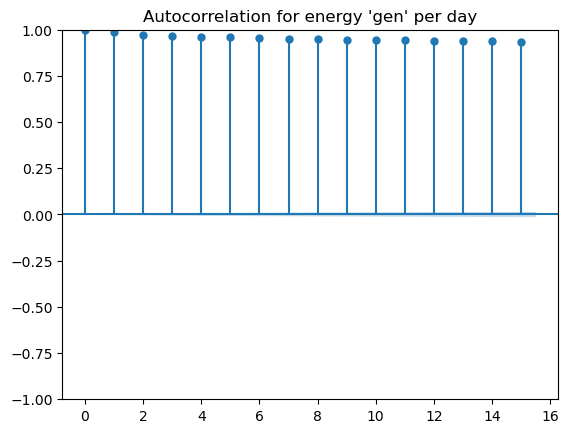

In [112]:
#Plot ACF for energy 'gen'

print("Autocorrelation for 'gen' = ", energy_per_day['gen'].autocorr())
fig = plot_acf(energy_data['gen'], lags=40, title="Autocorrelation for energy 'gen' per day")
plt.show()

**Data has positive autocorrelation. It provides good predictability with autocorrelation value = 0.41.**

Autocorrelation for 'use' =  0.6107009825029095


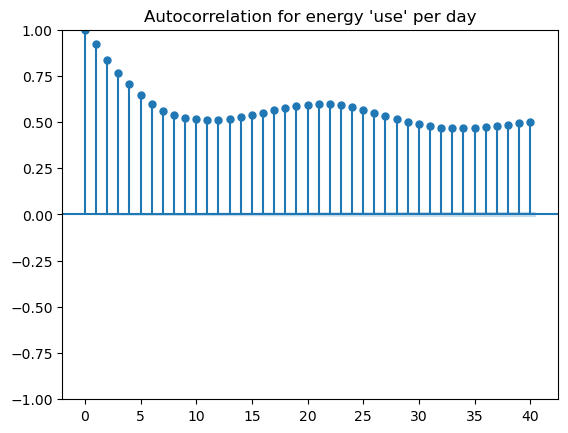

In [110]:
#Plot ACF for energy 'use'

print("Autocorrelation for 'use' = ", energy_per_day['use'].autocorr())
fig = plot_acf(energy_data['use'], lags=40, title="Autocorrelation for energy 'use' per day")
plt.show()

**Data has positive autocorrelation. It provides good predictability with autocorrelation value = 0.61.**

**2. Stationarity**

In [ ]:
Stationary data refers to the time series data that mean and variance do not vary across time.
The data is considered non-stationary if there is a strong trend or seasonality observed from the data.

In [70]:
# split the dataset into two, and calculate mean and variance for both subsets

X = energy_data.values    
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.113723, mean2=0.122265
variance1=0.093199, variance2=0.213008


**The dataset is splitted into two contiguous halves. Mean and variance is calculated for each subset. There is a little difference observed but it can be concluded that the values are essentially in the same ballpark.**